In [5]:
# https://www.ssa.gov/oact/babynames/limits.html?
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [6]:
import sys
sys.executable

'/Library/Frameworks/Python.framework/Versions/3.5/bin/python3.5'

In [7]:
!head -n 10 names/yob1896.txt

In [8]:
!ls names | wc

     136     136    1639


In [9]:
names1880 = pd.read_csv('names/yob1880.txt',names=['name','sex','births'],engine = 'python')
names1880[:5]

name sex  births
0       Mary   F    7065
1       Anna   F    2604
2       Emma   F    2003
3  Elizabeth   F    1939
4     Minnie   F    1746

In [10]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [11]:
years = range(1880,2014)
pieces = []
colums = ['name','sex','births']
for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path,names=colums,engine='python')
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces,ignore_index=True)
names[:5]

name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880

In [12]:
total_births = names.pivot_table('births',index=['year'],columns=['sex'],aggfunc=sum)
total_births.tail()

sex         F        M
year                  
2009  1832925  1979303
2010  1772738  1913851
2011  1753500  1893230
2012  1753922  1889414
2013  1745339  1881463

In [13]:
def add_group(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_group)
names[:5]

name sex  births  year      prop
0       Mary   F    7065  1880  0.077643
1       Anna   F    2604  1880  0.028618
2       Emma   F    2003  1880  0.022013
3  Elizabeth   F    1939  1880  0.021309
4     Minnie   F    1746  1880  0.019188

In [14]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [15]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000[:5]

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [16]:
pieces = []
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births',ascending=False)[:1000])
top1000 = pd.concat(pieces,ignore_index=True)
top1000[:5]


name sex  births  year      prop
0       Mary   F    7065  1880  0.077643
1       Anna   F    2604  1880  0.028618
2       Emma   F    2003  1880  0.022013
3  Elizabeth   F    1939  1880  0.021309
4     Minnie   F    1746  1880  0.019188

In [17]:
boys = top1000[top1000.sex == 'M']
boys[:5]

name sex  births  year      prop
942     John   M    9655  1880  0.087383
943  William   M    9532  1880  0.086269
944    James   M    5927  1880  0.053642
945  Charles   M    5348  1880  0.048402
946   George   M    5126  1880  0.046393

In [18]:
girls = top1000[top1000.sex == 'F']
girls[:5]

name sex  births  year      prop
0       Mary   F    7065  1880  0.077643
1       Anna   F    2604  1880  0.028618
2       Emma   F    2003  1880  0.022013
3  Elizabeth   F    1939  1880  0.021309
4     Minnie   F    1746  1880  0.019188

In [19]:
total_births = top1000.pivot_table('births',index=['year'],columns=['name'],aggfunc=sum)
total_births[:5]

name  Aaden  Aaliyah  Aarav  Aaron  Aarush  Ab  Abagail  Abb  Abbey  Abbie  \
year                                                                         
1880    NaN      NaN    NaN    102     NaN NaN      NaN  NaN    NaN     71   
1881    NaN      NaN    NaN     94     NaN NaN      NaN  NaN    NaN     81   
1882    NaN      NaN    NaN     85     NaN NaN      NaN  NaN    NaN     80   
1883    NaN      NaN    NaN    105     NaN NaN      NaN  NaN    NaN     79   
1884    NaN      NaN    NaN     97     NaN NaN      NaN  NaN    NaN     98   

name  ...   Zoa  Zoe  Zoey  Zoie  Zola  Zollie  Zona  Zora  Zula  Zuri  
year  ...                                                               
1880  ...     8   23   NaN   NaN     7     NaN     8    28    27   NaN  
1881  ...   NaN   22   NaN   NaN    10     NaN     9    21    27   NaN  
1882  ...     8   25   NaN   NaN     9     NaN    17    32    21   NaN  
1883  ...   NaN   23   NaN   NaN    10     NaN    11    35    25   NaN  
1884  ...    13   31   NaN   NaN    14       6     8    58    27   NaN  

[5 rows x 6996 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114396860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114364518>], dtype=object)

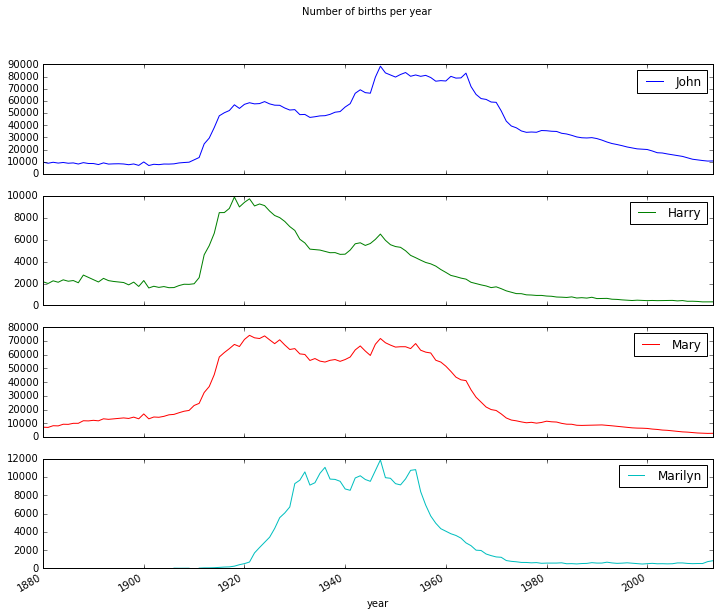

In [20]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113ca2f60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1140653c8>], dtype=object)

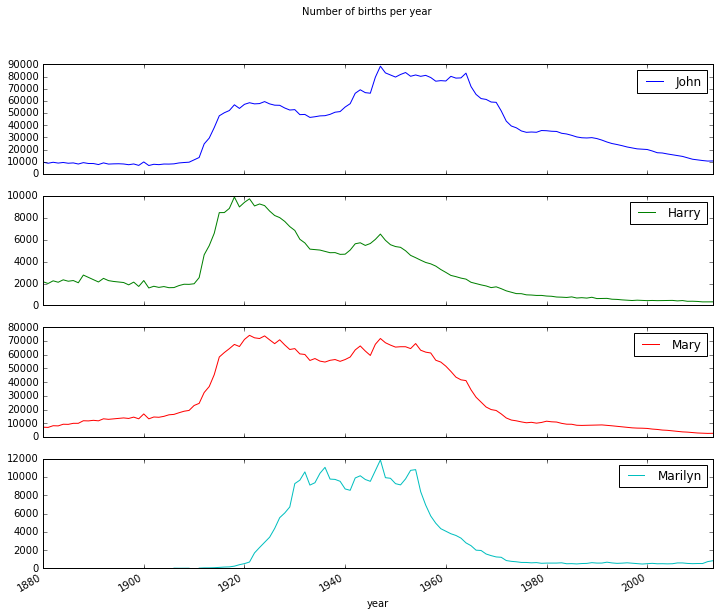

In [21]:
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')

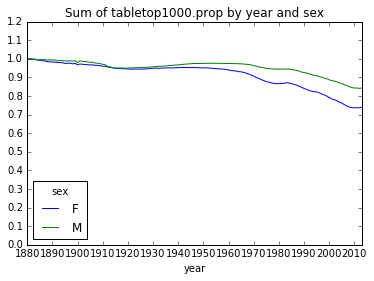

In [22]:
table = top1000.pivot_table('prop',index=['year'],columns=['sex'],aggfunc=sum)
table.plot(title='Sum of tabletop1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [23]:
df = boys[boys.year == 2010]
df

name sex  births  year      prop
260877        Jacob   M   22082  2010  0.011538
260878        Ethan   M   17985  2010  0.009397
260879      Michael   M   17308  2010  0.009044
260880       Jayden   M   17152  2010  0.008962
260881      William   M   17030  2010  0.008898
260882    Alexander   M   16742  2010  0.008748
260883         Noah   M   16428  2010  0.008584
260884       Daniel   M   15815  2010  0.008263
260885        Aiden   M   15516  2010  0.008107
260886      Anthony   M   15470  2010  0.008083
260887       Joshua   M   15410  2010  0.008052
260888        Mason   M   14831  2010  0.007749
260889  Christopher   M   14243  2010  0.007442
260890       Andrew   M   14221  2010  0.007431
260891        David   M   14171  2010  0.007404
260892      Matthew   M   14099  2010  0.007367
260893        Logan   M   14012  2010  0.007321
260894       Elijah   M   13867  2010  0.007246
260895        James   M   13852  2010  0.007238
260896       Joseph   M   13798  2010  0.007210
260897      Gabriel   M   12854  2010  0.006716
260898     Benjamin   M   12417  2010  0.006488
260899         Ryan   M   11963  2010  0.006251
260900       Samuel   M   11939  2010  0.006238
260901      Jackson   M   11804  2010  0.006168
260902         John   M   11539  2010  0.006029
260903       Nathan   M   11365  2010  0.005938
260904     Jonathan   M   11103  2010  0.005801
260905    Christian   M   11080  2010  0.005789
260906         Liam   M   10921  2010  0.005706
...             ...  ..     ...   ...       ...
261847       Lathan   M     203  2010  0.000106
261848         Kael   M     203  2010  0.000106
261849     Demarion   M     203  2010  0.000106
261850       Gibson   M     202  2010  0.000106
261851       Reagan   M     202  2010  0.000106
261852        Keyon   M     202  2010  0.000106
261853     Kingsley   M     201  2010  0.000105
261854        Talan   M     201  2010  0.000105
261855       Yehuda   M     201  2010  0.000105
261856    Cristofer   M     200  2010  0.000105
261857      Dashawn   M     200  2010  0.000105
261858       Daylen   M     200  2010  0.000105
261859       Jordon   M     200  2010  0.000105
261860      Sheldon   M     200  2010  0.000105
261861        Rowen   M     199  2010  0.000104
261862        Slade   M     199  2010  0.000104
261863        Kadin   M     199  2010  0.000104
261864        Masen   M     199  2010  0.000104
261865     Clarence   M     199  2010  0.000104
261866       Dillan   M     198  2010  0.000103
261867     Thaddeus   M     198  2010  0.000103
261868       Yousef   M     198  2010  0.000103
261869      Clinton   M     197  2010  0.000103
261870       Truman   M     197  2010  0.000103
261871      Keshawn   M     196  2010  0.000102
261872       Simeon   M     196  2010  0.000102
261873       Reuben   M     196  2010  0.000102
261874        Enoch   M     196  2010  0.000102
261875       Joziah   M     196  2010  0.000102
261876      Eliezer   M     196  2010  0.000102

[1000 rows x 5 columns]

In [24]:
# 分性别统计的前1000 个名字在总人数中的比例
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:5]

260877    0.011538
260878    0.020935
260879    0.029979
260880    0.038941
260881    0.047839
Name: prop, dtype: float64

In [25]:
prop_cumsum.searchsorted(0.5)

array([116])

In [26]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop',ascending=False).prop.cumsum()
in1900[:5]

40877    0.065309
40878    0.122306
40879    0.170446
40880    0.206347
40881    0.233596
Name: prop, dtype: float64

In [27]:
in1900.searchsorted(0.5) + 1

array([25])

In [28]:
def get_quantile_count(group,q=0.5):
    group = group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()


sex      F     M
year            
1880  [38]  [14]
1881  [38]  [14]
1882  [38]  [15]
1883  [39]  [15]
1884  [39]  [16]

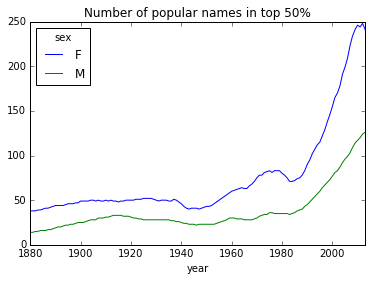

In [29]:
diversity.astype(float).plot(title='Number of popular names in top 50%')
# diversity.plot(title='Number of popular names in top 50%')

In [30]:
# http://www.babynamewizard.com/
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
# last_letters[:5]
last_letters.name = 'last_letter'
table = names.pivot_table('births',index=[last_letters],columns=['sex','year'],aggfunc=sum)
table

sex              F                                                          \
year          1880   1881   1882   1883   1884   1885   1886   1887   1888   
last_letter                                                                  
a            31446  31581  36536  38330  43680  45408  49100  48942  59441   
b              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
c              NaN    NaN      5      5    NaN    NaN    NaN    NaN    NaN   
d              609    607    734    810    916    862   1007   1027   1298   
e            33380  34080  40399  41913  48089  49616  53884  54353  66750   
f              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
g                7      5     12      8     24     11     18     25     44   
h             4863   4783   5567   5701   6602   6623   7146   7141   8630   
i               61     78     81     76     84     92     85    105    141   
j              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
k               13     15     11     17     21     18     27     19     21   
l             2541   2911   3527   3848   4808   5144   5721   6174   7900   
m               58     57     81     86     79     75    103     90    123   
n             3008   2959   3576   3837   4507   4735   5242   5512   6832   
o               30     49     35     47     74     84     93     97    134   
p              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
q              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
r              481    417    590    640    718    799    917    910   1207   
s             1391   1316   1637   1794   2039   2127   2524   2803   3582   
t             2151   2165   2399   2554   2825   2889   3017   3140   3816   
u              380    427    410    444    490    495    511    476    541   
v              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
w              NaN      5    NaN    NaN    NaN    NaN      5    NaN    NaN   
x              NaN    NaN    NaN      7    NaN    NaN    NaN    NaN    NaN   
y            10468  10404  12144  12063  13918  13927  14933  14980  17929   
z              106     95    106    141    148    150    202    188    238   

sex                  ...         M                                          \
year          1889   ...      2004    2005    2006    2007    2008    2009   
last_letter          ...                                                     
a            58632   ...     38673   36877   36210   34723   32988   31573   
b              NaN   ...     45939   43178   42645   42190   40047   39038   
c              NaN   ...     26793   26102   26661   26893   25365   24127   
d             1374   ...     51805   50730   51474   50686   48018   46310   
e            66661   ...    142190  141237  143126  143915  141234  135857   
f              NaN   ...      1906    1988    1970    2090    2198    2215   
g               28   ...      1838    1884    1931    2045    2063    2400   
h             8825   ...     89707   92582   98635   99608  100544  100407   
i              134   ...     28525   31356   33595   35297   38232   41060   
j              NaN   ...      1094    1293    1243    1255    1383    1419   
k               22   ...     41420   42183   42575   42176   39651   37616   
l             8395   ...    152917  155442  156433  155438  151119  144195   
m              137   ...     43080   41637   42568   43927   44408   46423   
n             7103   ...    676380  686815  721724  742299  735193  717422   
o              142   ...     88867   92054   96405   96989   91593   86572   
p              NaN   ...      2841    2769    2724    2747    2650    2600   
q              NaN   ...       523     446     431     432     339     377   
r             1214   ...    169553  172184  176654  177423  174926  173669   
s             3569   ...    139732  140031  143356  142354  137337  130259   
t             3784   

In [31]:
subtable = table.reindex(columns=[1990,1960,2010],level='year')
subtable.head()

sex               F                       M                
year           1990    1960    2010    1990    1960    2010
last_letter                                                
a            718903  691245  675901   52168    5214   28814
b               155     694     454   27954    3912   39208
c               369      49     953   28958   15466   23307
d              2540    3728    2635  101989  262143   44758
e            338628  435048  316288  146527  178810  130073

In [32]:
subtable.sum()

sex  year
F    1990    1897709
     1960    2022093
     2010    1772738
M    1990    2052543
     1960    2132717
     2010    1913851
dtype: float64

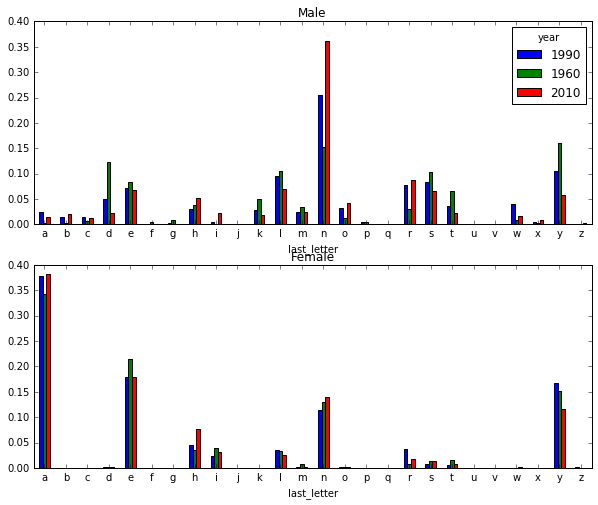

In [33]:
letter_prop = subtable / subtable.sum().astype(float)
fig ,axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

In [34]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.ix[['d','n','y'],'M'].T
dny_ts.head()

last_letter         d         n         y
year                                     
1880         0.083057  0.153216  0.075762
1881         0.083240  0.153209  0.077453
1882         0.085339  0.149558  0.077537
1883         0.084059  0.151650  0.079146
1884         0.086120  0.149924  0.080405

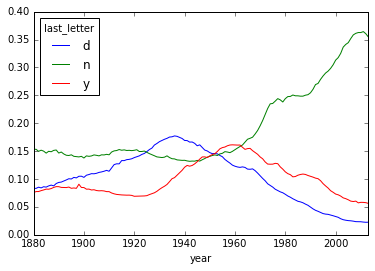

In [35]:
dny_ts.plot()

In [36]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [37]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35032
Lesli        929
Leslie    374135
Lesly      11154
Name: births, dtype: int64

In [38]:
table = filtered.pivot_table('births',index=['year'],columns=['sex'],aggfunc='sum')
# table.plot()
table = table.div(table.sum(1),axis=0)
table.tail()

sex   F   M
year       
2009  1 NaN
2010  1 NaN
2011  1 NaN
2012  1 NaN
2013  1 NaN

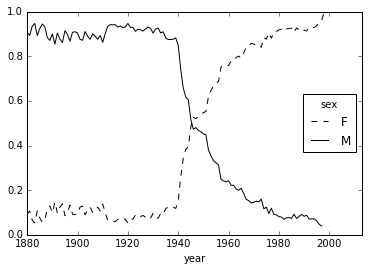

In [39]:
table.plot(style={'M':'k-','F':'k--'})